In [1]:
import pandas as pd 
sl = pd.read_csv('sl.csv')
ir = pd.read_csv('ir.csv')
sl.head(5)

,Unnamed: 0,Player,Mat,Inns,NO,Runs,BF,HS,Ave,SR,...,Span,Overs,Mdns,Wkts,BBI,Econ,5,10,Ct,St
0,0,AMCJK Athapaththu,46,41.0,4.0,1088.0,1036.0,195.0,57.26,147.71,...,0.0,99.5,3.0,14.0,0.0,4.99,0.0,0.0,3.0,0.0
1,1,BMSM Kumari,24,17.0,1.0,33.0,52.0,18.0,8.25,113.86,...,0.0,84.0,1.0,10.0,0.0,5.29,0.0,0.0,6.0,0.0
2,2,GWHM Perera,34,14.0,1.0,289.0,439.0,46.0,22.23,65.83,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,3.0,0.0
3,3,H Karunaratne,22,10.0,0.0,99.0,228.0,33.0,11.00,43.42,...,0.0,1.0,0.0,0.0,0.0,15.00,0.0,0.0,2.0,0.0
4,4,H Madavi,40,19.0,4.0,486.0,680.0,105.0,32.40,71.47,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,9.0,0.0


In [2]:
ir.head(5)

,Unnamed: 0,Player,Mat,Inns,NO,Runs,BF,HS,Ave,SR,...,Span,Overs,Mdns,Wkts,BBI,Econ,5,10,Ct,St
0,0,AMCJK Athapaththu,46,41.0,4.0,1088.0,1036.0,195.0,57.26,147.71,...,0.0,99.5,3.0,14.0,0.0,4.99,0.0,0.0,3.0,0.0
1,1,BMSM Kumari,24,17.0,1.0,33.0,52.0,18.0,8.25,113.86,...,0.0,84.0,1.0,10.0,0.0,5.29,0.0,0.0,6.0,0.0
2,2,GWHM Perera,34,14.0,1.0,289.0,439.0,46.0,22.23,65.83,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,3.0,0.0
3,3,H Karunaratne,22,10.0,0.0,99.0,228.0,33.0,11.00,43.42,...,0.0,1.0,0.0,0.0,0.0,15.00,0.0,0.0,2.0,0.0
4,4,H Madavi,40,19.0,4.0,486.0,680.0,105.0,32.40,71.47,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,9.0,0.0


In [3]:
sl.columns

Index(['Unnamed: 0', 'Player', 'Mat', 'Inns', 'NO', 'Runs', 'BF', 'HS', 'Ave',
       'SR', '100', '50', '0', '4s', '6s', 'Span', 'Overs', 'Mdns', 'Wkts',
       'BBI', 'Econ', '5', '10', 'Ct', 'St'],
      dtype='object')

In [4]:
df = pd.concat([sl,ir])

<Axes: >

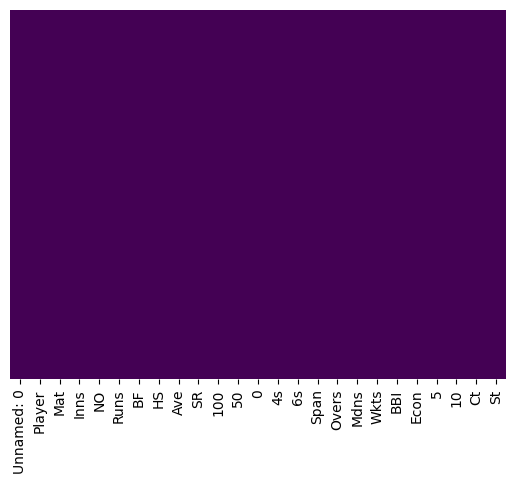

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
df.replace('-', 0, inplace=True)

In [7]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
    ms = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
    ms = ms[ms["Percent"] > 0]
    
    if ms.empty:
        print("No missing data found.")
        return ms
    f, ax = plt.subplots(figsize=(8, 6))
    plt.xticks(rotation=90)
    sns.barplot(x=ms.index, y=ms["Percent"], color="green", alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    
    return ms


In [8]:
missingdata(df)

No missing data found.


,Total,Percent


In [9]:
df = df.drop(['Span'],axis = 1)
df.head(5)

,Unnamed: 0,Player,Mat,Inns,NO,Runs,BF,HS,Ave,SR,...,6s,Overs,Mdns,Wkts,BBI,Econ,5,10,Ct,St
0,0,AMCJK Athapaththu,46,41.0,4.0,1088.0,1036.0,195.0,57.26,147.71,...,30.0,99.5,3.0,14.0,0.0,4.99,0.0,0.0,3.0,0.0
1,1,BMSM Kumari,24,17.0,1.0,33.0,52.0,18.0,8.25,113.86,...,0.0,84.0,1.0,10.0,0.0,5.29,0.0,0.0,6.0,0.0
2,2,GWHM Perera,34,14.0,1.0,289.0,439.0,46.0,22.23,65.83,...,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,3.0,0.0
3,3,H Karunaratne,22,10.0,0.0,99.0,228.0,33.0,11.00,43.42,...,1.0,1.0,0.0,0.0,0.0,15.00,0.0,0.0,2.0,0.0
4,4,H Madavi,40,19.0,4.0,486.0,680.0,105.0,32.40,71.47,...,2.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,9.0,0.0


In [10]:
df.columns

Index(['Unnamed: 0', 'Player', 'Mat', 'Inns', 'NO', 'Runs', 'BF', 'HS', 'Ave',
       'SR', '100', '50', '0', '4s', '6s', 'Overs', 'Mdns', 'Wkts', 'BBI',
       'Econ', '5', '10', 'Ct', 'St'],
      dtype='object')

In [11]:
numeric_columns = ['Mat', 'Inns', 'NO', 'Runs', 'BF', 'HS', 'Ave',
       'SR', '100', '50', '0', '4s', '6s', 'Overs', 'Mdns', 'Wkts', 'BBI',
       'Econ', '5', '10', 'Ct', 'St']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [12]:
df['avg_100'] = df['100'] / df['Inns'].replace(0, pd.NA) * 100
df['avg_50'] = df['50'] / df['Inns'].replace(0, pd.NA) * 100
df['avg_0'] = df['0'] / df['Inns'].replace(0, pd.NA) * 100
df['avg_4s'] = df['4s'] / df['Inns'].replace(0, pd.NA) * 100
df['avg_6s'] = df['6s'] / df['Inns'].replace(0, pd.NA) * 100
df['avg_wkts'] = df['Wkts'] / df['Inns'].replace(0, pd.NA) * 100
df['avg_mdns'] = df['Mdns'] / df['Inns'].replace(0, pd.NA) * 100
df['avg_ct'] = df['Ct'] / df['Inns'].replace(0, pd.NA) * 100

In [13]:
df.rename(columns={
    'avg_100': 'avg_100_per_innings',
    'avg_50': 'avg_50_per_innings',
    'avg_0': 'avg_0_per_innings',
    'avg_4s': 'avg_4s_per_innings',
    'avg_6s': 'avg_6s_per_innings',
    'avg_wkts': 'avg_wkts_per_innings',
    'avg_mdns': 'avg_mdns_per_innings',
    'avg_ct': 'avg_ct_per_innings'
}, inplace=True)

In [14]:
df.drop(['Unnamed: 0'],axis = 1)
df.to_csv('df.csv',index=False)

In [15]:
df['fantasy_score'] = df['Ave'] + (df['avg_4s_per_innings']*1) + (df['avg_6s_per_innings']*2) + (df['avg_50_per_innings']*8) + (df['avg_100_per_innings']*16) - (df['avg_0_per_innings']*2) + (df['avg_wkts_per_innings']*25) + (df['avg_mdns_per_innings']*12) + (df['5']*16) + (df['avg_ct_per_innings']*8) + (df['St']*12)

In [16]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# df['Player_Encoded'] = label_encoder.fit_transform(df['Player'])

In [17]:
X = df.drop(['fantasy_score','Player'],axis=1)
y = df['fantasy_score']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32, 31), (8, 31), (32,), (8,))

In [18]:
from sklearn.ensemble import RandomForestRegressor
model_0 = RandomForestRegressor(n_estimators=100, random_state=42)
model_0.fit(X_train,y_train)
feature_importance = model_0.feature_importances_
feature_importance

array([1.90459935e-02, 5.00068542e-03, 1.44005012e-02, 7.78447851e-03,
       3.15385268e-02, 1.78304031e-02, 2.65185320e-02, 3.70515024e-02,
       5.42704453e-02, 1.01808789e-04, 3.80940155e-04, 1.24817621e-03,
       3.72173745e-02, 5.52419000e-04, 1.43522942e-02, 2.40718705e-02,
       2.48537757e-01, 0.00000000e+00, 6.06403931e-03, 4.69808142e-03,
       0.00000000e+00, 8.52583376e-03, 1.90236669e-03, 2.10908669e-04,
       4.07831103e-04, 2.78779188e-03, 2.39170828e-02, 5.78054308e-04,
       3.36594734e-01, 4.85329919e-02, 2.58765751e-02])

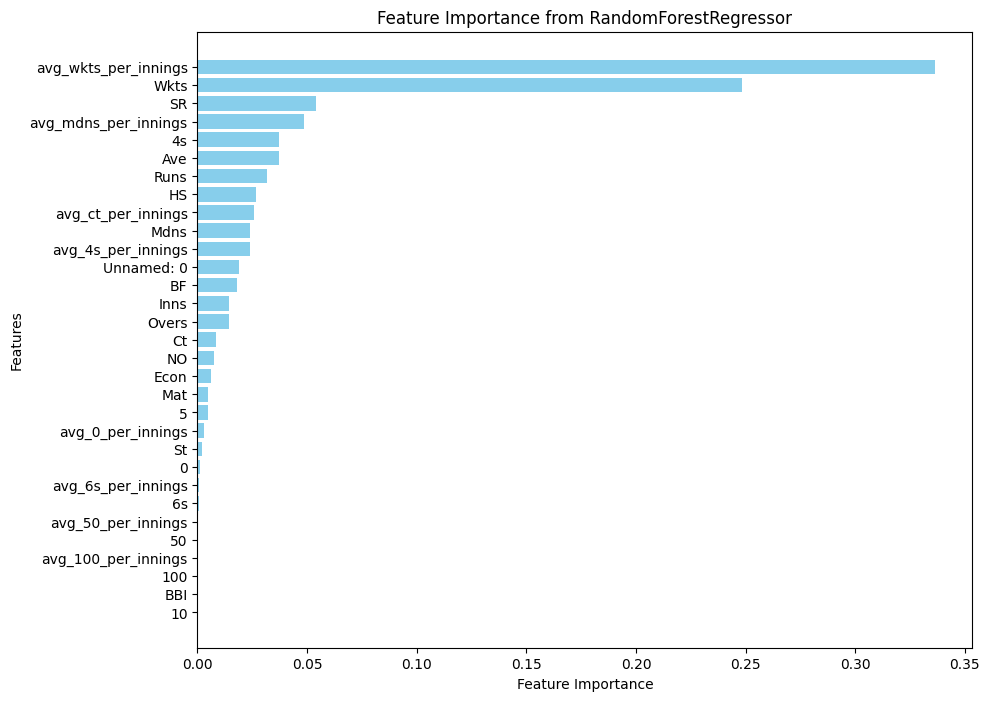

In [19]:
features = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from RandomForestRegressor')
plt.gca().invert_yaxis()  
plt.show()

In [20]:
from lazypredict import Supervised
reg = Supervised.LazyRegressor(predictions = True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 42/42 [00:01<00:00, 39.94it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 32, number of used features: 0
[LightGBM] [Info] Start training from score 1267.311560
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the s

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,357223179.19,-1224765181.35,42127787.48,0.01
LinearSVR,1.77,-1.63,1951.79,0.01
MLPRegressor,1.75,-1.59,1935.72,0.05
KernelRidge,1.33,-0.14,1287.52,0.01
QuantileRegressor,1.32,-0.11,1268.33,0.02
SVR,1.31,-0.08,1250.52,0.01
NuSVR,1.31,-0.08,1248.35,0.01
HistGradientBoostingRegressor,1.31,-0.06,1240.84,0.03
DummyRegressor,1.31,-0.06,1240.84,0.01


In [21]:
import xgboost as xgb 
from sklearn.metrics import mean_squared_error, r2_score
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100, random_state=42)

xg_reg.fit(X_train, y_train)


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [22]:
y_pred = xg_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 110.59873650282283
R^2 Score: 0.999923675196403


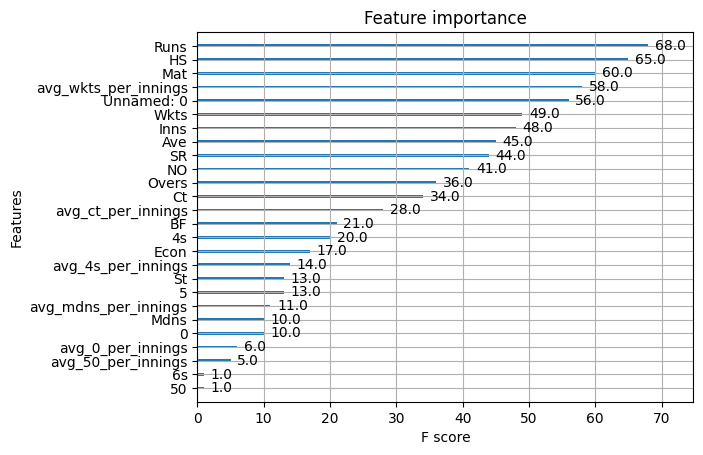

In [23]:
xgb.plot_importance(xg_reg, importance_type='weight')
plt.show()

In [24]:
y_final = xg_reg.predict(X)
df['Predicted_Score'] = y_final

In [25]:
df_sorted = df.sort_values(by='Predicted_Score', ascending=False)
df_sorted.head(100)

,Unnamed: 0,Player,Mat,Inns,NO,Runs,BF,HS,Ave,SR,...,avg_100_per_innings,avg_50_per_innings,avg_0_per_innings,avg_4s_per_innings,avg_6s_per_innings,avg_wkts_per_innings,avg_mdns_per_innings,avg_ct_per_innings,fantasy_score,Predicted_Score
17,17,SIP Fernando,4,2.00,0.00,0.00,0.00,0.00,0.00,102.00,...,0.00,0.00,0.00,0.00,0.00,50.00,250.00,0.00,4250.00,4221.56
17,17,SIP Fernando,4,2.00,0.00,0.00,0.00,0.00,0.00,102.00,...,0.00,0.00,0.00,0.00,0.00,50.00,250.00,0.00,4250.00,4221.56
16,16,S Nisansala,12,10.00,2.00,20.00,21.00,17.00,10.00,128.03,...,0.00,0.00,10.00,10.00,0.00,80.00,20.00,10.00,2336.00,2327.57
16,16,S Nisansala,12,10.00,2.00,20.00,21.00,17.00,10.00,128.03,...,0.00,0.00,10.00,10.00,0.00,80.00,20.00,10.00,2336.00,2327.57
13,13,OU Ranasinghe,36,29.00,2.00,93.00,175.00,20.00,8.45,84.64,...,0.00,0.00,3.45,24.14,0.00,75.86,17.24,6.90,2200.31,2199.45
13,13,OU Ranasinghe,36,29.00,2.00,93.00,175.00,20.00,8.45,84.64,...,0.00,0.00,3.45,24.14,0.00,75.86,17.24,6.90,2200.31,2199.45
19,19,WK Dilhari,44,39.00,3.00,424.00,549.00,84.00,26.50,109.13,...,0.00,5.13,10.26,87.18,7.69,64.10,10.26,17.95,2018.81,2018.60
19,19,WK Dilhari,44,39.00,3.00,424.00,549.00,84.00,26.50,109.13,...,0.00,5.13,10.26,87.18,7.69,64.10,10.26,17.95,2018.81,2018.60
1,1,BMSM Kumari,24,17.00,1.00,33.00,52.00,18.00,8.25,113.86,...,0.00,0.00,0.00,17.65,0.00,58.82,5.88,35.29,1849.43,1849.25
1,1,BMSM Kumari,24,17.00,1.00,33.00,52.00,18.00,8.25,113.86,...,0.00,0.00,0.00,17.65,0.00,58.82,5.88,35.29,1849.43,1849.25
